# Project 4 - Polynomial Regression from Scratch

In this notebook, you will write code that will:
-  generate a dataset, 
-  model it using a polynomial regression, 
-  and find the optimal model parameters for it (writing your own optimization routine).

All of the parts of this are meant to be done "from scratch", so do not use sklearn. (numpy's ok)  
Note: this is a continuation of the exercise we started in class previously.  

In [1]:
import numpy as np    
import sys as sys
import matplotlib.pyplot as plt

## Dataset
Create a dataset with 1,000 1-D X and corresponding y values, each w/ a small amount of added uniform random noise (max val = 0.1).  (So unlike example in class which had a surface and 2 features, this is like the book example with a curve with 1 feature.)

-  make X go from -5 to 5 (plus noise)
-  make $y = 5 + 7x + 2x^2 - 0.5x^3$   (plus noise)

base matrix shape
(1000, 2)


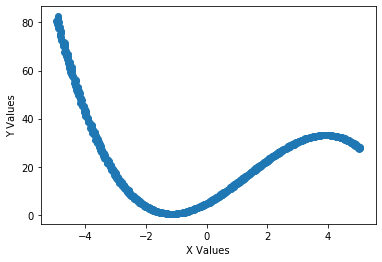

In [2]:
def make_base_matrix():
    X = np.transpose([np.linspace(-5, 5, 1000)])
    Y = 5 + 7*X + 2*X**2 - 0.5*X**3

    def add_noise_to_column(column):
        for i in range(0, len(column)):
            column[i] += np.random.random_sample()*0.1
        return column

    X = add_noise_to_column(X)
    Y = add_noise_to_column(Y)

    matrix = np.concatenate((X, Y), axis=1)#Create our starting dataset.
    return matrix

matrix = make_base_matrix()
print("base matrix shape")
print(np.shape(matrix))

graph = plt.scatter(matrix[:,0], matrix[:,1])
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show(graph)

## Augment X
Write a function that adds new columns to the dataset of powers of X, up to and including $X^5$ (and don't forget the ones for the $\theta_0$ term).

In [3]:
#VERSION 1
def add_columns_of_powers(matrix, highest_power):
    if len(matrix[0]) < highest_power+3:#Keeps this from getting run when it already has
        X = matrix[:,0]
        for current_power in range(0, highest_power+1):
            power = (len(matrix[0]) - 2)#be dynamic, and fall into our pattern.
            new_column = X**power
            new_column = np.transpose([new_column])
            matrix = np.concatenate((matrix, new_column), axis=1)
    else:
            return matrix
    return matrix

matrix = add_columns_of_powers(matrix, 5)
print("matrix shape: " + str(np.shape(matrix)))

matrix shape: (1000, 8)


[ 4.70035815e+00  6.81980159e+00  2.08450479e+00 -5.05680240e-01
 -8.31437871e-04  2.99696164e-04]


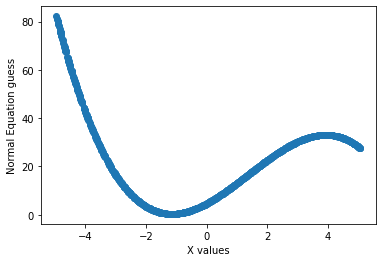

In [4]:
#testing normal equation:
powers = matrix[:,2:len(matrix[0] - 1)]
theta_best = np.linalg.inv(np.transpose(powers).dot(powers)).dot(np.transpose(powers)).dot(matrix[:,1])
print(theta_best)

guesses = np.zeros(len(powers))
for i in range(0, len(powers)):
    guesses[i] = theta_best.dot(powers[i])

normal_test = plt.scatter(matrix[:,0], guesses)
plt.xlabel("X values")
plt.ylabel("Normal Equation guess")
plt.show(normal_test)

## Fit a Polynomial Regression model to the training data
Assume that we have a polynomial regression model
\begin{equation*}
y(X;\theta) = \theta_0 + \theta_1 x + \theta_2 x^2 +\theta_3 x^3 +\theta_4 x^4 +\theta_5 x^5 
\end{equation*}

Assume that we're using a mean squared error function.

-  Find the optimal value of theta (ie $\theta_0$ through $\theta_5$). Note: Refer to Ch. 4, Eqn's 4.6 and 4.7.

-  Try this for a variety of different values of alpha.  Note how long it takes for the optimization to converge (or if it doesn't).


In [5]:
#version with gradient cutoff
def fit_theta(matrix, num_iterations=1000, learning_rate=0.1, gradient_cutoff = 9999):
    
    powers = matrix[:,2:len(matrix[0] - 1)]
    y_values = matrix[:,1]
    theta = np.zeros(len(powers[0]))
    
    def keep_iterating(gradient, gradient_cutoff):
        for partialDerivative in range(0, len(gradient)):
            if gradient[partialDerivative] > gradient_cutoff:
                return False
        return True
        
    for i in range(0, num_iterations):
        gradient = 2/len(matrix)*np.transpose(powers).dot(powers.dot(theta) - y_values)#definition of gradient
        if(keep_iterating(gradient, gradient_cutoff)):
            theta = theta - (learning_rate*gradient)
    return theta

best_theta = fit_theta(matrix, 100000, .0000004)#tweaking the hyperparameters a lot can lead to better results
print("best theta:" + str(best_theta))

best theta:[ 0.40321742  0.28785109  1.60654107  0.45099059  0.03700965 -0.03020033]


## Plot the Final Model
Make a plot showing the (X,y) data points of the training set, and superimpose the line for the model on the same plot.

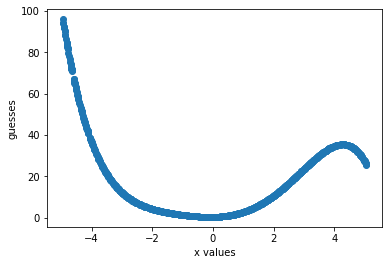

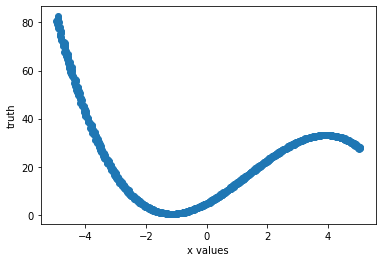

In [6]:
#get a list of guesses and graph them, then graph the truth
def plot_model(matrix, theta):
    
    powers = matrix[:,2:len(matrix[0] - 1)]
    
    guesses = np.zeros(len(powers))
    for i in range(0, len(powers)):
        guesses[i] = theta.dot(powers[i])

    guesses = plt.scatter(matrix[:,0], guesses)
    plt.xlabel("x values")
    plt.ylabel("guesses")
    plt.show(guesses)

    truth = plt.scatter(matrix[:,0], matrix[:,1])
    plt.xlabel("x values")
    plt.ylabel("truth")
    plt.show(truth)

plot_model(matrix, best_theta)

## Different Model Degrees
Try the model for different degrees of n, specifically n = (2, 5, 10).  Plot the resulting models.

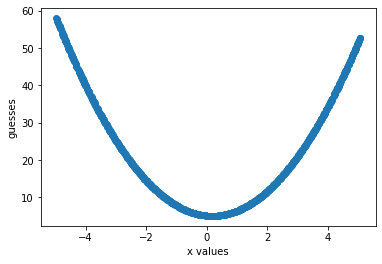

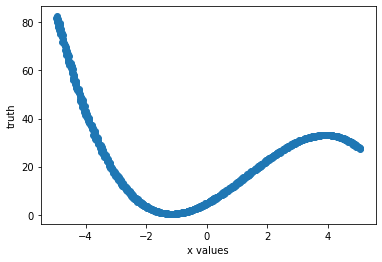

In [20]:
def run_process_for_power(power, iterations, learning_rate):
    matrix2 = make_base_matrix()
    matrix2 = add_columns_of_powers(matrix2, power)
    best_theta_2 = fit_theta(matrix2, iterations, learning_rate)
    powers = matrix2[:,2:len(matrix2[0] - 1)]
    plot_model(matrix2, best_theta_2)

run_process_for_power(2, 100000, 0.0001)

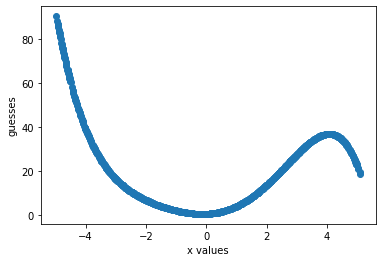

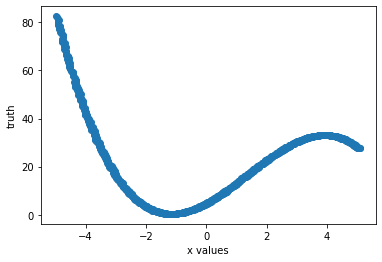

In [12]:
run_process_for_power(5, 100000, 0.000001)

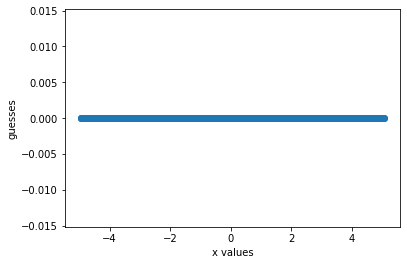

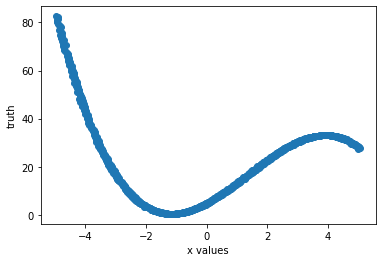

In [16]:
run_process_for_power(10, 10000, 2)